In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv("TitanicTrain.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
titanic.shape

(891, 12)

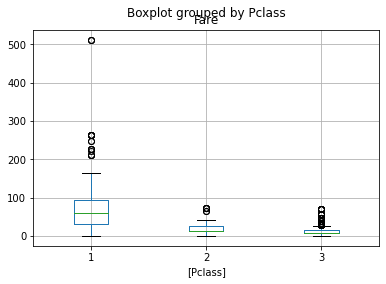

In [7]:
boxplot = titanic[['Fare','Pclass']].boxplot(by='Pclass',return_type='dict' )

In [8]:
titanic[['Fare','Pclass']].groupby('Pclass').describe()

Fare                                                              
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

Task 1, Question 3

For Pclass2, lower whisker value is 0 because it is lowest value and there is no outliers. We have outliers for upper whisker, so it will be max value that is no greater than third quartile plus 1.5 times IQR 26 + (1.5 * (26 - 13)) = 45.5. -B[0, 45.5]

In [9]:
auto = pd.read_csv("Auto.csv")

In [10]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,Manufacturer
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford


Task 2, Question 1: Compute the mean mpg grouped by cylinder.

In [17]:
meanMpg = auto.groupby('cylinders')['mpg'].agg(np.mean)
meanMpg

cylinders
3    20.550000
4    29.283920
5    27.366667
6    19.973494
8    14.963107
Name: mpg, dtype: float64

Question 2: Create a box plot of mpg vs cylinder

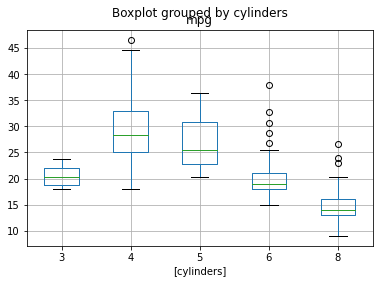

In [18]:
autoBoxplot = auto[['mpg','cylinders']].boxplot(by='cylinders', return_type='dict')

Question 3: Find the median and lower/upper quartiles.

In [20]:
autoDescribe = auto[['mpg','cylinders']].groupby('cylinders').describe()
autoDescribe

mpg                                                      
           count       mean       std   min    25%    50%    75%   max
cylinders                                                             
3            4.0  20.550000  2.564501  18.0  18.75  20.25  22.05  23.7
4          199.0  29.283920  5.670546  18.0  25.00  28.40  32.95  46.6
5            3.0  27.366667  8.228204  20.3  22.85  25.40  30.90  36.4
6           83.0  19.973494  3.828809  15.0  18.00  19.00  21.00  38.0
8          103.0  14.963107  2.836284   9.0  13.00  14.00  16.00  26.6

Median

In [23]:
medianMpg = auto.groupby('cylinders')['mpg'].agg(np.median)
medianMpg

cylinders
3    20.25
4    28.40
5    25.40
6    19.00
8    14.00
Name: mpg, dtype: float64

lower/upper quartiles

C3(18.75, 22.05),
C4(25, 32.95),
C5(22.85, 30.90),
C6(18, 21),
C8(13, 16)

Question 4: Compute the correlation coefficient between mpg and weight

In [26]:
np.corrcoef(auto['mpg'],auto['weight'])

array([[ 1.        , -0.83224421],
       [-0.83224421,  1.        ]])

<AxesSubplot:xlabel='mpg', ylabel='weight'>

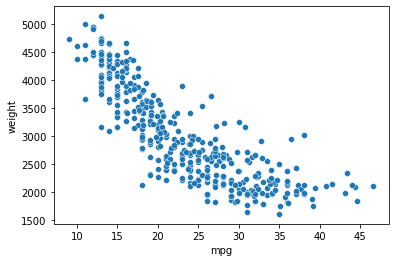

In [31]:
sns.scatterplot(data=auto, x='mpg', y='weight')

Question 5: Compute the correlation coefficient between mpg and origin

In [27]:
np.corrcoef(auto['mpg'],auto['origin'])

array([[1.        , 0.56520876],
       [0.56520876, 1.        ]])

<AxesSubplot:xlabel='mpg', ylabel='origin'>

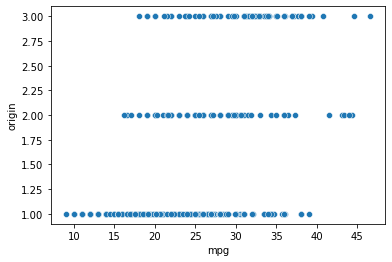

In [32]:
sns.scatterplot(data=auto, x='mpg', y='origin')

Question 5 compare two examples

In the first example we have -0.83 correlation which means strong negative corr. For corr coeff, we need two variables that one is independent and the other one is dependent. In our example, weight is independent and mpg is dependent variable. When weigth of cars decreases, mpg will increase.
On the other hand, we can not compute corr coeff for second question because the origin of cars is categorical data which means stored into groups. We need numerical datas such as weight, age and temperature.

Question 6: What is correlation coefficient "good for"? Can you e.g. use it to make predictions, like in our previous simple probabilty models? If not, what is missing? Think about a loss function which would make sense for such a prediction task?

With corr coeff, we can understand if there is a relation between two variables. I think, it is possible to make predictions. If there is a strong correlation, predictions will be powerfull. We have a strong negative correlation with a -0.83 value in our example. It is a negative correlation which means one variable goes down and the other goes up. The result is clear. I believe, I can make my predictions based on this. Using the correlation, we can predict that mpg wil be low if the weight of the car is above 3000.